In [1]:
import numpy as np
from scipy.integrate import solve_ivp, quad
import matplotlib.pyplot as plt
R = 8.314  # gas constant in J/mol-K
def CpA(T):
    return -0.703029 + (108.4773 * (T / 1000)) - (42.52157 * (T / 1000)**2) + (5.862788 * (T / 1000)**3) + (0.678565 / ((T / 1000)**2))
    # if T < 1300:
    #     return -0.703029 + (108.4773 * (T / 1000)) - (42.52157 * (T / 1000)**2) + (5.862788 * (T / 1000)**3) + (0.678565 / ((T / 1000)**2))
    # else:
    #     return 85.81217 + (11.26467 * (T / 1000)) - (2.114146 * (T / 1000)**2) + (0.138190 * (T / 1000)**3) - (26.42221 / ((T / 1000)**2))

def CpB(T):
    return 30.09200 + (6.832514 * (T / 1000)) + (6.793435 * (T / 1000)**2) - (2.534480 * (T / 1000)**3) + (0.082139 / ((T / 1000)**2))

def CpC(T):
    return 30.03235 + (8.772972 * (T / 1000)) - (3.988133 * (T / 1000)**2) + (0.788313 * (T / 1000)**3) - (0.741599 / ((T / 1000)**2))
    # if T < 700:
    #     return 31.32234 - (20.23532 * (T / 1000)) + (57.86644 * (T / 1000)**2) - (36.50624 * (T / 1000)**3) + (0.0007374 / ((T / 1000)**2))
    # else:
    #     return 30.03235 + (8.772972 * (T / 1000)) - (3.988133 * (T / 1000)**2) + (0.788313 * (T / 1000)**3) - (0.741599 / ((T / 1000)**2))

def CpD(T):
    return 25.56759 + (6.09613 * (T / 1000)) + (4.054656 * (T / 1000)**2) - (2.671301 * (T / 1000)**3) + (0.131021 / ((T / 1000)**2))
    # if T < 1300:
    #     return 25.56759 + (6.09613 * (T / 1000)) + (4.054656 * (T / 1000)**2) - (2.671301 * (T / 1000)**3) + (0.131021 / ((T / 1000)**2))
    # else:
    #     return 35.15070 + (1.300095 * (T / 1000)) - (0.205921 * (T / 1000)**2) + (0.01355 * (T / 1000)**3) - (3.28278 / ((T / 1000)**2))

def CpE(T):
    return 24.99735 + (55.18696 * (T / 1000)) - (33.69137 * (T / 1000)**2) + (7.948387 * (T / 1000)**3) - (0.136638 / ((T / 1000)**2))
    # if T < 1200:
    #     return 24.99735 + (55.18696 * (T / 1000)) - (33.69137 * (T / 1000)**2) + (7.948387 * (T / 1000)**3) - (0.136638 / ((T / 1000)**2))
    # else:
    #     return 58.16639 + (2.720074 * (T / 1000)) - (0.492289 * (T / 1000)**2) + (0.038844 * (T / 1000)**3) - (6.447293 / ((T / 1000)**2))

def CpF(T):
    return 33.066178 - (11.363417 * (T / 1000)) + (11.432816 * (T / 1000)**2) - (2.772874 * (T / 1000)**3) - (0.158558 / ((T / 1000)**2))
def CpG(T):
    return 19.50583 + (19.88705 * (T / 1000)) - (8.598535 * (T / 1000)**2) + (1.369784 * (T / 1000)**3) + (0.527601 / ((T / 1000)**2))
    # if T < 500:
    #     return 28.98641 + (1.853978 * (T / 1000)) - (9.647459 * (T / 1000)**2) + (16.63537 * (T / 1000)**3) + (0.000117 / ((T / 1000)**2))
    # else:
    #     return 19.50583 + (19.88705 * (T / 1000)) - (8.598535 * (T / 1000)**2) + (1.369784 * (T / 1000)**3) + (0.527601 / ((T / 1000)**2))


def Hrxn1(T):
    integral_CpF = quad(CpF, 298, T)[0]
    integral_CpD = quad(CpD, 298, T)[0]
    integral_CpB = quad(CpB, 298, T)[0]
    integral_CpA = quad(CpA, 298, T)[0]
    return 206.2e3 + 3 * integral_CpF + integral_CpD - integral_CpB - integral_CpA

def Hrxn2(T):
    integral_CpF = quad(CpF, 298, T)[0]
    integral_CpE = quad(CpE, 298, T)[0]
    integral_CpB = quad(CpB, 298, T)[0]
    integral_CpA = quad(CpA, 298, T)[0]
    return 164.9e3 + 4 * integral_CpF + integral_CpE - 2 * integral_CpB - integral_CpA

def Hrxn3(T):
    integral_CpF = quad(CpF, 298, T)[0]
    integral_CpE = quad(CpE, 298, T)[0]
    integral_CpB = quad(CpB, 298, T)[0]
    integral_CpD = quad(CpD, 298, T)[0]
    return -41.1e3 + integral_CpF + integral_CpE - integral_CpB - integral_CpD

def Hrxn4(T):
    integral_CpB = quad(CpB, 298, T)[0]
    integral_CpE = quad(CpE, 298, T)[0]
    integral_CpC = quad(CpC, 298, T)[0]
    integral_CpA = quad(CpA, 298, T)[0]
    return -802.7e3 + 2 * integral_CpB + integral_CpE - 2 * integral_CpC - integral_CpA

def rates(T):
    k1 = 1.17e15 * np.exp(-240100 / (R * T))
    k2 = 2.83e14 * np.exp(-243900 / (R * T))
    k3 = 5.43e5 * np.exp(-67130 / (R * T))
    k4a = 8.11e5 * np.exp(-86000 / (R * T))
    k4b = 6.82e5 * np.exp(-86000 / (R * T))

    return k1, k2, k3, k4a, k4b

def Keqm(T):
    KI = np.exp(-26830 / T + 30.114)
    KIII = np.exp(4400 / T - 4.036)  # equilibrium constant for water gas shift (reaction 3)
    KII = KI * KIII
    return KI, KII, KIII

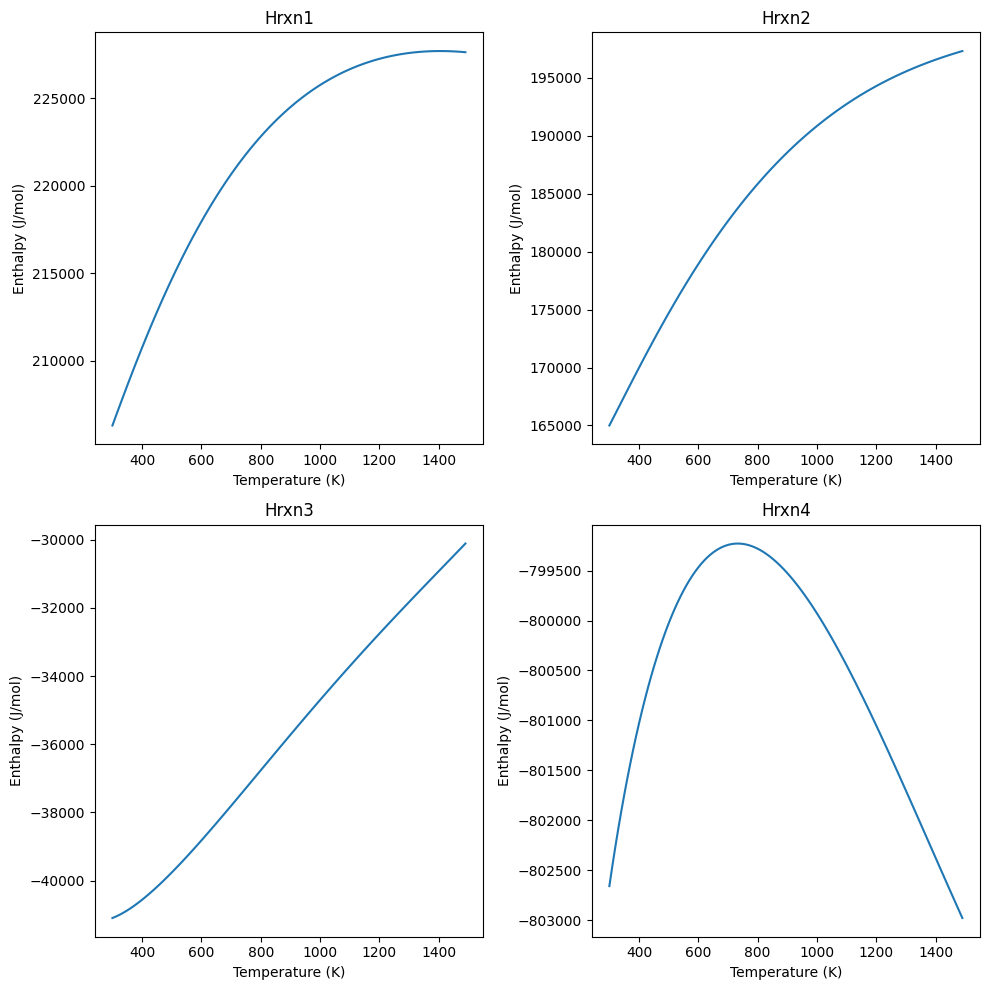

In [2]:
T_span = [300 + 10*i for i in range(120)]
H1 = [Hrxn1(T) for T in T_span]
H2 = [Hrxn2(T) for T in T_span]
H3 = [Hrxn3(T) for T in T_span]
H4 = [Hrxn4(T) for T in T_span]

# create a big plot with 4 subplots
fig, axs = plt.subplots(2, 2, figsize=(10, 10))
axs[0, 0].plot(T_span, H1)
axs[0, 0].set_title('Hrxn1')
axs[0, 0].set_xlabel('Temperature (K)')
axs[0, 0].set_ylabel('Enthalpy (J/mol)')
axs[0, 1].plot(T_span, H2)
axs[0, 1].set_title('Hrxn2')
axs[0, 1].set_xlabel('Temperature (K)')
axs[0, 1].set_ylabel('Enthalpy (J/mol)')
axs[1, 0].plot(T_span, H3)
axs[1, 0].set_title('Hrxn3')
axs[1, 0].set_xlabel('Temperature (K)')
axs[1, 0].set_ylabel('Enthalpy (J/mol)')
axs[1, 1].plot(T_span, H4)
axs[1, 1].set_title('Hrxn4')
axs[1, 1].set_xlabel('Temperature (K)')
axs[1, 1].set_ylabel('Enthalpy (J/mol)')
plt.tight_layout()




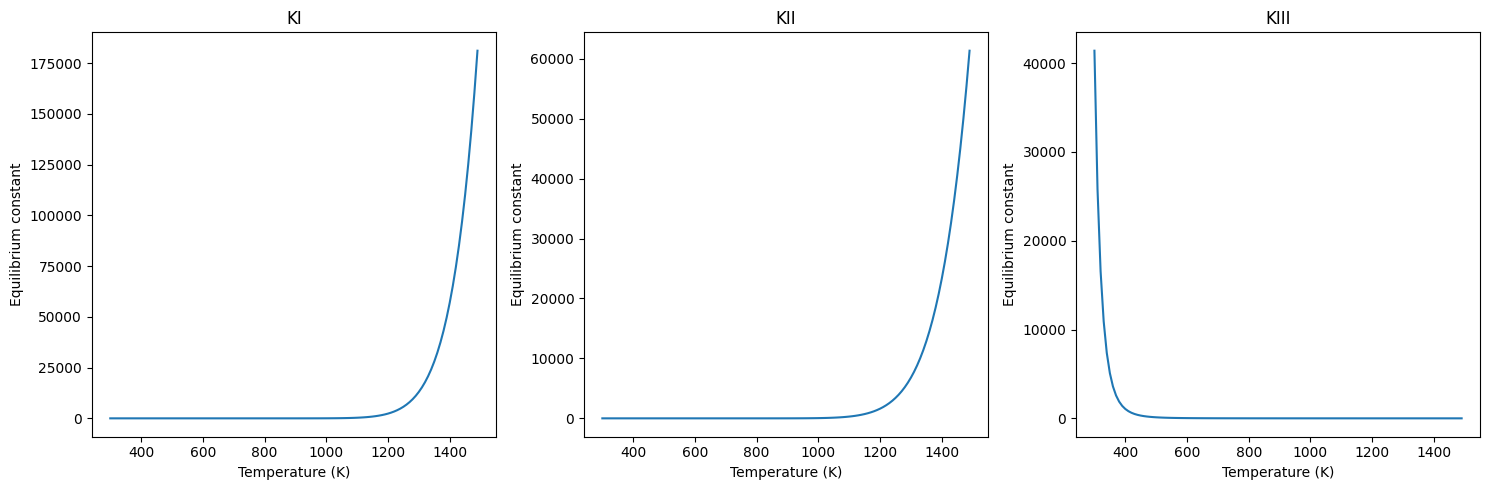

In [3]:
KI = [Keqm(T)[0] for T in T_span]
KII = [Keqm(T)[1] for T in T_span]
KIII = [Keqm(T)[2] for T in T_span]
fig, axs = plt.subplots(1, 3, figsize=(15, 5))
axs[0].plot(T_span, KI)
axs[0].set_title('KI')
axs[0].set_xlabel('Temperature (K)')
axs[0].set_ylabel('Equilibrium constant')
axs[1].plot(T_span, KII)
axs[1].set_title('KII')
axs[1].set_xlabel('Temperature (K)')
axs[1].set_ylabel('Equilibrium constant')
axs[2].plot(T_span, KIII)
axs[2].set_title('KIII')
axs[2].set_xlabel('Temperature (K)')
axs[2].set_ylabel('Equilibrium constant')
plt.tight_layout()


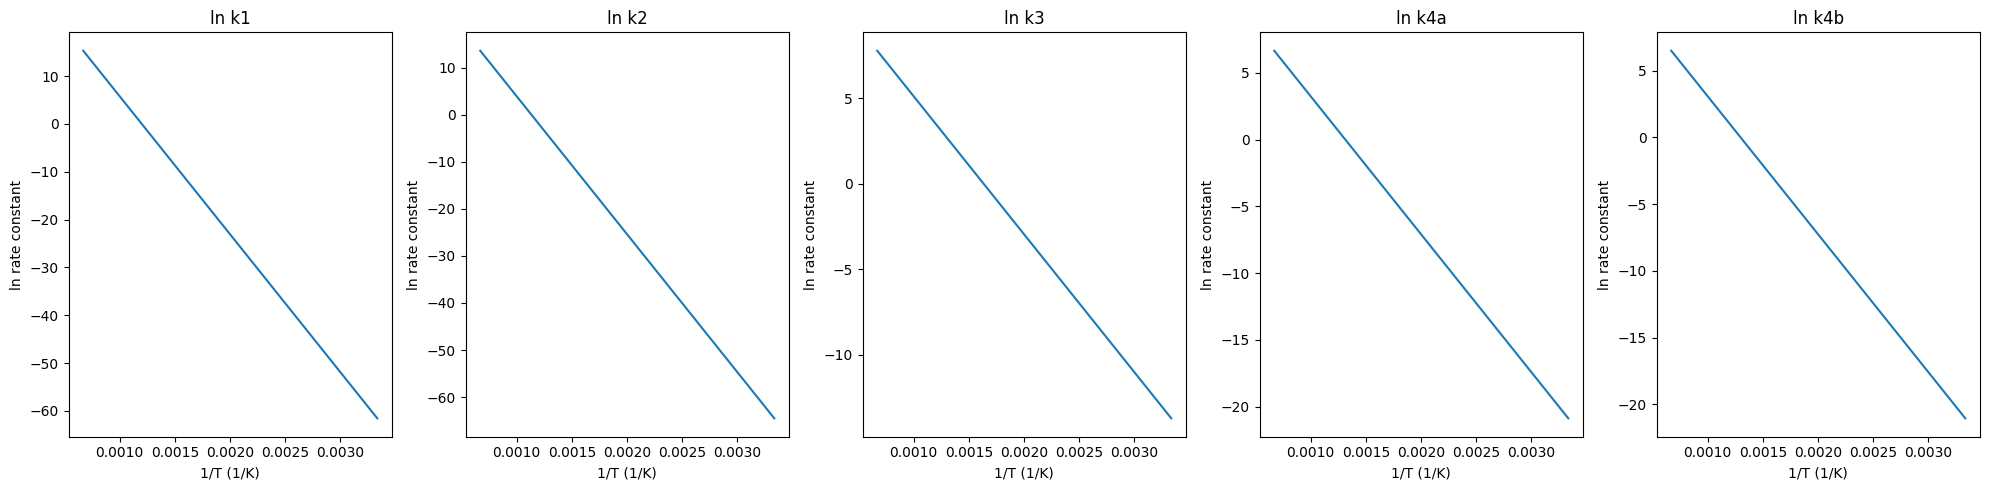

In [4]:
k1 = [rates(T)[0] for T in T_span]
lnk1 = [np.log(k) for k in k1]
k2 = [rates(T)[1] for T in T_span]
lnk2 = [np.log(k) for k in k2]
k3 = [rates(T)[2] for T in T_span]
lnk3 = [np.log(k) for k in k3]
k4a = [rates(T)[3] for T in T_span]
lnk4a = [np.log(k) for k in k4a]
k4b = [rates(T)[4] for T in T_span]
lnk4b = [np.log(k) for k in k4b]
Tinv = [1/T for T in T_span]
fig, axs = plt.subplots(1, 5, figsize=(20, 5))
axs[0].plot(Tinv, lnk1)
axs[0].set_title('ln k1')
axs[0].set_xlabel('1/T (1/K)')
axs[0].set_ylabel('ln rate constant')
axs[1].plot(Tinv, lnk2)
axs[1].set_title('ln k2')
axs[1].set_xlabel('1/T (1/K)')
axs[1].set_ylabel('ln rate constant')
axs[2].plot(Tinv, lnk3)
axs[2].set_title('ln k3')
axs[2].set_xlabel('1/T (1/K)')
axs[2].set_ylabel('ln rate constant')
axs[3].plot(Tinv, lnk4a)
axs[3].set_title('ln k4a')
axs[3].set_xlabel('1/T (1/K)')
axs[3].set_ylabel('ln rate constant')
axs[4].plot(Tinv, lnk4b)
axs[4].set_title('ln k4b')
axs[4].set_xlabel('1/T (1/K)')
axs[4].set_ylabel('ln rate constant')
plt.tight_layout()


In [17]:

def shift_ode(w, F):
    # isothermal, isobaric
    FCH4, FH2O, FO2, FCO, FCO2, FH2, FN2, T, P = F
    FT = FCH4 + FH2O + FO2 + FCO + FCO2 + FH2 + FN2

    # Partial pressures
    pCH4 = (FCH4 / FT) * P
    pH2O = (FH2O / FT) * P
    pO2 = (FO2 / FT) * P
    pCO = (FCO / FT) * P
    pCO2 = (FCO2 / FT) * P
    pH2 = (FH2 / FT) * P
    pN2 = (FN2 / FT) * P

    # Constants
    R = 8.314  # J/mol-K

    # Rate constants
    k1, k2, k3, k4a, k4b = rates(T)
    KI, KII, KIII = Keqm(T)
    # k1 = 1.17e15 * np.exp(-240100 / (R * T))
    # k2 = 2.83e14 * np.exp(-243900 / (R * T))
    # k3 = 5.43e5 * np.exp(-67130 / (R * T))
    # KI = np.exp(-26830 / T + 30.114)
    # KIII = np.exp(4400 / T - 4.036) #equil constant for wgs (reaction 3)
    # KII = KI * KIII
    # k4a = 8.11e5 * np.exp(-86000 / (R * T))
    # k4b = 6.82e5 * np.exp(-86000 / (R * T))

    # Adsorption equilibrium constants
    KCH4 = 6.65e-4 * np.exp(38280 / (R * T))
    KCO = 8.23e-5 * np.exp(70650 / (R * T))
    KH2 = 6.12e-9 * np.exp(82900 / (R * T))
    KH2O = 1.77e5 * np.exp(-88680 / (R * T))
    sigma = 1 + KCH4 * pCH4 + KCO * pCO + KH2 * pH2 + KH2O * (pH2O / pH2)

    # Reaction rates
    rate1 = (k1 / pH2**2.5) * (pCH4 * pH2O - pH2**3 * pCO / KI) / sigma**2
    rate2 = (k2 / pH2**3.5) * (pCH4 * pH2O**2 - pH2**4 * pCO2 / KII) / sigma**2
    rate3 = (k3 / pH2) * (pCO * pH2O - pH2 * pCO2 / KIII) / sigma**2
    rate4 = (k4a * pCH4 * pO2 / sigma**2 + k4b * pCH4 * pO2 / sigma)

    # Differential equations
    dFdw = np.zeros(9)
    dFdw[0] = -rate1 - rate2 - rate4  # CH4
    dFdw[1] = -rate1 - 2 * rate2 - rate3 + 2 * rate4  # H2O
    dFdw[2] = -rate4  # O2
    dFdw[3] = rate1 - rate3  # CO
    dFdw[4] = rate2 + rate3  # CO2
    dFdw[5] = 3 * rate1 + 4 * rate2 + rate3  # H2
    dFdw[6] = 0  # N2 (inert)
    dFdw[7] = 0  # Temperature (no dynamic update here)
    dFdw[8] = 0  # Pressure (no dynamic update here)
    return dFdw

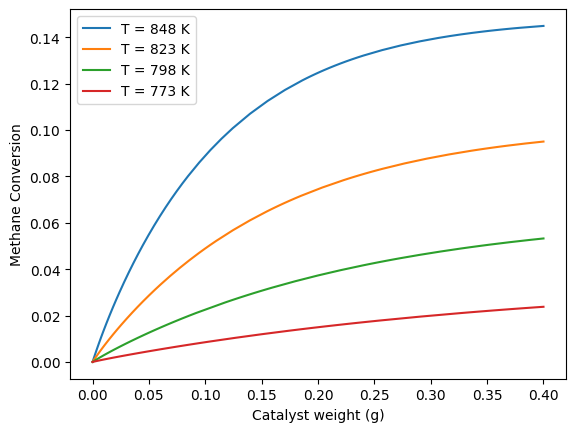

In [18]:
# Initial conditions
T_list = [848, 823, 798, 773] 
# Integration range
w_span = [0, 0.0004]  # Catalyst weight range (kg)
for T in T_list:
    F0 = [1 / 3600, 3 / 3600, 0, 0, 0, 1.25 / 3600, 0, T, 10]
    sol = solve_ivp(shift_ode, w_span, F0, method='LSODA', rtol=1e-6, atol=1e-9)
    w = sol.t # Catalyst weight (kg)
    # covert to grams
    w = w * 1000
    F = sol.y.T
    # get conversion
    FCH4 = F[:, 0]
    FCH4in = F0[0]
    X = (FCH4in - FCH4) / FCH4in
    # Plot
    plt.plot(w, X, label='T = {} K'.format(T))
    plt.xlabel('Catalyst weight (g)')
    plt.ylabel('Methane Conversion')
    plt.legend()

In [19]:
def shiftb(w, F):
    FCH4, FH2O, FO2, FCO, FCO2, FH2, FN2, T, P = F
    FT = FCH4 + FH2O + FO2 + FCO + FCO2 + FH2 + FN2

    # Partial pressures of each species
    pCH4 = (FCH4 / FT) * P
    pH2O = (FH2O / FT) * P
    pO2 = (FO2 / FT) * P
    pCO = (FCO / FT) * P
    pCO2 = (FCO2 / FT) * P
    pH2 = (FH2 / FT) * P
    pN2 = (FN2 / FT) * P

    k1, k2, k3, k4a, k4b = rates(T)
    KI, KII, KIII = Keqm(T)

    # Adsorption equilibrium constants
    KCH4 = 6.65e-4 * np.exp(38280 / (R * T))
    KCO = 8.23e-5 * np.exp(70650 / (R * T))
    KH2 = 6.12e-9 * np.exp(82900 / (R * T))
    KH2O = 1.77e5 * np.exp(-88680 / (R * T))
    sigma = 1 + KCH4 * pCH4 + KCO * pCO + KH2 * pH2 + KH2O * (pH2O / pH2)

    KC_CH4 = 1.26e-1 * np.exp(27300 / (R * T))
    KC_O2 = 7.78e-7 * np.exp(92800 / (R * T))
    sigma1 = 1 + KC_CH4 * pCH4 + KC_O2 * pO2

    FtCp = FCH4 * CpA(T) + FH2O * CpB(T) + FO2 * CpC(T) + FCO * CpD(T) + FCO2 * CpE(T) + FH2 * CpF(T) + FN2 * CpG(T)

    # Rate expressions for each reaction
    rate1 = 0.07 * (k1 / pH2**2.5) * (pCH4 * pH2O - pH2**3 * pCO / KI) / sigma**2
    rate2 = 0.06 * (k2 / pH2**3.5) * (pCH4 * pH2O**2 - pH2**4 * pCO2 / KII) / sigma**2
    rate3 = 0.7 * (k3 / pH2) * (pCO * pH2O - pH2 * pCO2 / KIII) / sigma**2
    rate4 = 0.05 * (k4a * pCH4 * pO2 / sigma1**2 + k4b * pCH4 * pO2 / sigma1)

    # Differential equations (species balances)
    dFdw = np.zeros(9)

    # Methane
    dFdw[0] = -rate1 - rate2 - rate4

    # Water (H2O)
    dFdw[1] = -rate1 - 2 * rate2 - rate3 + 2 * rate4

    # Oxygen (O2)
    dFdw[2] = -2 * rate4
    #dFdw[2] = - rate4

    # Carbon monoxide (CO)
    dFdw[3] = rate1 - rate3

    # Carbon dioxide (CO2)
    dFdw[4] = rate2 + rate3 + rate4
    #dFdw[4] = rate2 + rate3

    # Hydrogen (H2)
    dFdw[5] = 3 * rate1 + 4 * rate2 + rate3

    # Nitrogen (N2)
    dFdw[6] = 0

    #Temperature change (non-isothermal case)
    dFdw[7] = (-rate1 * Hrxn1(T) - rate2 * Hrxn2(T) - rate3 * Hrxn3(T) - rate4 * Hrxn4(T)) / FtCp

    #Pressure change
    dFdw[8] = 0

    return dFdw

Text(0.5, 0, 'Catalyst weight (kg)')

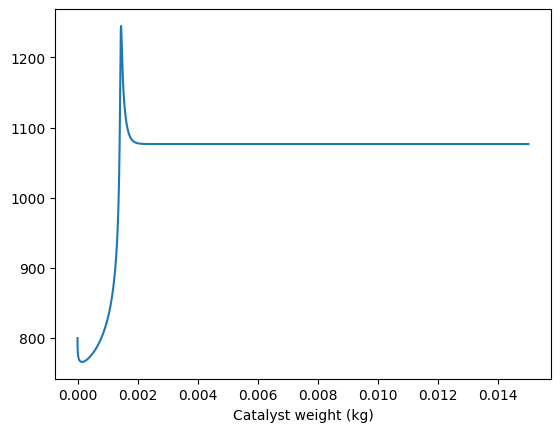

In [22]:
F0 = [0.1 / 3600, 0.15 / 3600, 0.05/3600, 0, 0, 0.001 / 3600, 0.188/3600, 800, 14]
sol = solve_ivp(shiftb, [0, 0.0015], F0, method='LSODA', rtol=1e-6, atol=1e-9)
F = sol.y.T
w = sol.t * 10
T = F[:, 7]
plt.plot(w, T)
plt.xlabel('Catalyst weight (kg)')
# plt.ylabel('Temperature (K)')


In [23]:
def visc(y, T):

    # Constants
    Mw = np.array([16.043, 44.01, 28.01, 18.015, 2.016, 28.014, 31.999])
    Vc = np.array([98.6, 94.07, 93.1, 55.95, 65.00, 90.1, 73.37])
    Tc = np.array([190.56, 304.12, 132.85, 647.14, 33.25, 126.2, 154.58])
    w = np.array([0.011, 0.225, 0.045, 0.344, -0.216, -0.037, 0])
    dip = np.array([0.0, 0.0, 0.1, 1.8, 0, 0, 0])
    kap = np.array([0, 0, 0, 0.076, 0, 0, 0])

    # Normalize to get mole fractions
    y = y / np.sum(y)

    # Calculate individual species viscosities
    Tstar = 1.2593 * T / Tc
    dipr = 131.1 * dip / np.sqrt(Vc * Tc)
    fc = 1 - 0.2756 * w + 0.059035 * dipr**4 + kap
    ohm = 1.16145 * Tstar**-0.14874 + 0.52487 * np.exp(-0.77320 * Tstar) + 2.16178 * np.exp(-2.43787 * Tstar)
    vct = Vc**(2/3)
    visc = 40.785 * fc * (Mw * T)**0.5 / (vct * ohm)

    # Calculate mixture viscosity
    phi = np.zeros((len(y), len(y)))
    for i in range(len(y)):
        for j in range(len(y)):
            term1 = (visc[i] / visc[j])**0.5
            term2 = (Mw[j] / Mw[i])**0.25
            term3 = Mw[i] / Mw[j]
            phi[i, j] = (1 + term1 * term2)**2 / (8 * (1 + term3))**0.5

    sumb = 0
    for i in range(len(y)):
        suma = 0
        for j in range(len(y)):
            suma += y[j] * phi[i, j]
        sumb += y[i] * visc[i] / suma

    viscm = sumb * 1e-6 / 10 # Convert to Pascals-seconds
    return viscm


def shiftc(w, F):
    FCH4, FH2O, FO2, FCO, FCO2, FH2, FN2, T, P = F
    FT = FCH4 + FH2O + FO2 + FCO + FCO2 + FH2 + FN2

    # Partial pressures of each species
    pCH4 = (FCH4 / FT) * P
    pH2O = (FH2O / FT) * P
    pO2 = (FO2 / FT) * P
    pCO = (FCO / FT) * P
    pCO2 = (FCO2 / FT) * P
    pH2 = (FH2 / FT) * P
    pN2 = (FN2 / FT) * P

    k1, k2, k3, k4a, k4b = rates(T)
    KI, KII, KIII = Keqm(T)

    # Adsorption equilibrium constants
    KCH4 = 6.65e-4 * np.exp(38280 / (R * T))
    KCO = 8.23e-5 * np.exp(70650 / (R * T))
    KH2 = 6.12e-9 * np.exp(82900 / (R * T))
    KH2O = 1.77e5 * np.exp(-88680 / (R * T))
    sigma = 1 + KCH4 * pCH4 + KCO * pCO + KH2 * pH2 + KH2O * (pH2O / pH2)

    KC_CH4 = 1.26e-1 * np.exp(27300 / (R * T))
    KC_O2 = 7.78e-7 * np.exp(92800 / (R * T))
    sigma1 = 1 + KC_CH4 * pCH4 + KC_O2 * pO2

    # Heat capacities (considered constant for simplicity)
    # CpA = -0.703029 + (108.4773 * (T / 1000)) - (42.52157 * (T / 1000)**2) + (5.862788 * (T / 1000)**3) + (0.678565 / (T / 1000)**2)
    # CpB = 30.09200 + (6.832514 * (T / 1000)) + (6.793435 * (T / 1000)**2) - (2.534480 * (T / 1000)**3) + (0.082139 / (T / 1000)**2)
    # CpC = 30.03235 + (8.772972 * (T / 1000)) - (3.988133 * (T / 1000)**2) + (0.788313 * (T / 1000)**3) - (0.741599 / (T / 1000)**2)
    # CpD = 25.56759 + (6.09613 * (T / 1000)) + (4.054656 * (T / 1000)**2) - (2.671301 * (T / 1000)**3) + (0.131021 / (T / 1000)**2)
    # CpE = 24.99735 + (55.18696 * (T / 1000)) - (33.69137 * (T / 1000)**2) + (7.948387 * (T / 1000)**3) - (0.136638 / (T / 1000)**2)
    # CpF = 33.066178 - (11.363417 * (T / 1000)) + (11.432816 * (T / 1000)**2) - (2.772874 * (T / 1000)**3) - (0.158558 / (T / 1000)**2)
    # CpG = 19.50583 + (19.88705 * (T / 1000)) - (8.598535 * (T / 1000)**2) + (1.369784 * (T / 1000)**3) + (0.527601 / (T / 1000)**2)

    #FtCp = FCH4 * CpA + FH2O * CpB + FO2 * CpC + FCO * CpD + FCO2 * CpE + FH2 * CpF + FN2 * CpG
    FtCp = FCH4 * CpA(T) + FH2O * CpB(T) + FO2 * CpC(T) + FCO * CpD(T) + FCO2 * CpE(T) + FH2 * CpF(T) + FN2 * CpG(T)

    # Heat of reactions (in J/mol)
    # Hrxn1 = 224e3
    # Hrxn2 = 187e3
    # Hrxn3 = -37.3e3
    # Hrxn4 = -802.7e3

    # Pressure drop equation
    por = 0.4  # porosity
    Dtube = 1 * 0.0254  # in meters (1-inch tube diameter)
    Dp = 2e-3  # diameter of spherical catalyst in meters
    epsilon = por
    rhocat = 1870  # kg_cat/m^3
    mdot = (FCH4 * 16 + FH2O * 18 + FO2 * 32 + FCO * 28 + FCO2 * 44 + FH2 * 2 + FN2 * 28) / 1000  # in kg/s
    Area = np.pi * Dtube**2 / 4  # m^2 cross-sectional area of tube
    G = mdot / Area  # mass flux in kg/m^2-s
    y = np.array([FCH4, FCO2, FCO, FH2O, FH2, FN2, FO2])
    viscm = visc(y,T)
    print(viscm)
    MWavg = (FCH4 * 16 + FH2O * 18 + FO2 * 32 + FCO * 28 + FCO2 * 44 + FH2 * 2 + FN2 * 28) / FT
    rho = ((P * 1e5) * MWavg) / (R * T)/ 1000  # density in kg/m^3
    Um = G / rho  # superficial velocity in m/s
    term1 = 150 * (1 - epsilon)**2 / (epsilon**3) * viscm * Um / Dp**2
    term2 = 1.75 * (1 - epsilon) / (epsilon**3) * (G * Um / Dp)
    
    # Conversion factor for dz to dw
    conv_factor = Area * rhocat * (1 - epsilon)
    dPdw = -(term1 + term2) / conv_factor / 1e5  # dP/dw in bars

    # Rate expressions for each reaction
    rate1 = 0.07 * (k1 / pH2**2.5) * (pCH4 * pH2O - pH2**3 * pCO / KI) / sigma**2
    rate2 = 0.06 * (k2 / pH2**3.5) * (pCH4 * pH2O**2 - pH2**4 * pCO2 / KII) / sigma**2
    rate3 = 0.7 * (k3 / pH2) * (pCO * pH2O - pH2 * pCO2 / KIII) / sigma**2
    rate4 = 0.05 * (k4a * pCH4 * pO2 / sigma1**2 + k4b * pCH4 * pO2 / sigma1)

    # Differential equations (species balances)
    dFdw = np.zeros_like(F)

    # Methane
    dFdw[0] = -rate1 - rate2 - rate4

    # Water (H2O)
    dFdw[1] = -rate1 - 2 * rate2 - rate3 + 2 * rate4

    # Oxygen (O2)
    dFdw[2] = -2*rate4
    #dFdw[2] = -rate4

    # Carbon monoxide (CO)
    dFdw[3] = rate1 - rate3

    # Carbon dioxide (CO2)
    dFdw[4] = rate2 + rate3 + rate4
    #dFdw[4] = rate2+rate3

    # Hydrogen (H2)
    dFdw[5] = 3 * rate1 + 4 * rate2 + rate3

    # Nitrogen (N2)
    dFdw[6] = 0

    #Temperature change (non-isothermal case)
    dFdw[7] = (-rate1 * Hrxn1(T) - rate2 * Hrxn2(T) - rate3 * Hrxn3(T) - rate4 * Hrxn4(T)) / FtCp

    #Pressure change
    dFdw[8] = dPdw

    return dFdw

3.2374475888427764e-05
3.235273633042456e-05
3.236058311653408e-05
3.235834401348524e-05
3.2369041994404544e-05
3.2369675559600734e-05
3.236960723182039e-05
3.237322910795301e-05
3.2373265106256775e-05
3.237205223591057e-05
3.2372085701418246e-05
3.236979121789369e-05
3.23697855041253e-05
3.236760546956989e-05
3.2367597963462454e-05
3.2365514943612605e-05
3.2365508860705207e-05
3.236038842278091e-05
3.236038610707658e-05
3.235568242568707e-05
3.235572891440734e-05
3.2351422886586543e-05
3.235143908921992e-05
3.234744256352312e-05
3.2347452253787846e-05
3.234076751081044e-05
3.2340803564219876e-05
3.233474196955343e-05
3.233478685780711e-05
3.2329243009288793e-05
3.2329266587226085e-05
3.2324135950809655e-05
3.232414996670895e-05
3.2316315367065856e-05
3.23163539054375e-05
3.230922286665383e-05
3.2309267352170294e-05
3.2302721148232876e-05
3.2302745091325705e-05
3.229667090081278e-05
3.2296685509882254e-05
3.2287484959547236e-05
3.2287524663635804e-05
3.227912948227837e-05
3.22791755751

Text(0, 0.5, 'Pressure (bar)')

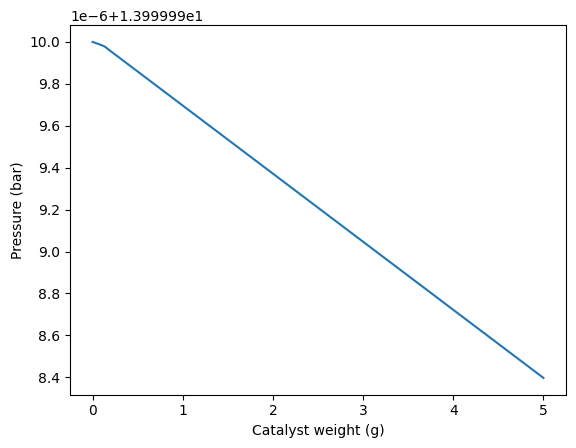

In [25]:
F0 = [0.1/ 3600, 0.15/ 3600, 0.05/3600,0, 0, 0.001/3600, 0.188/3600, 800, 14]
w_span = [0, 0.005]  # Catalyst weight range to 0.5kg
sol = solve_ivp(shiftc, w_span, F0, method='LSODA', rtol=1e-6, atol=1e-9)
w = sol.t # Catalyst weight (kg)
w = w * 1000
F = sol.y.T
P = F[:, 8]
print(P)
# Plot
plt.plot(w, P)
plt.xlabel('Catalyst weight (g)')
plt.ylabel('Pressure (bar)')